In [1]:
"""analysis of launch coins using data from \

coin_day_launch_report365_normalised
coin_details
"""

'analysis of launch coins using data from \ncoin_day_launch_report365_normalised\ncoin_details\n'

In [746]:
import seaborn as sns
import pandas as pd
import json
import copy
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)  #suppress scientic notication
sns.set_context("talk")
sns.set(rc={'figure.figsize':(15,8.27)})

In [433]:
df = pd.read_csv("/Users/adam/development/coingecko-analysis/data/processed_tables/coin_day_launch_report365.csv")

In [716]:
###function to simplify labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [434]:
df.head()

,day_number,goldblock,arth,interest-bearing-dpi,dexa-coin,californium,able,intelligent-investment-chain,marginswap,astro,...,golden-bridge-coin,neon-exchange,tmc-niftygotchi,gomics,aos,coinfirm-amlt,nms-token,april,scc,vixco
0,0,0.003,2.588,462.521,0.000,0.038,0.002,0.007,1.062,2.759,...,0.055,1.969,0.011,0.362,0.038,0.062,0.039,0.015,0.023,0.458
1,1,0.002,2.588,462.521,0.000,0.059,0.002,0.007,1.062,3.847,...,0.055,2.015,0.011,0.371,0.039,0.069,0.036,nan,0.020,0.458
2,2,0.002,2.076,469.608,0.000,0.038,0.002,0.006,0.689,4.393,...,0.049,2.000,0.010,0.357,0.039,0.061,0.032,nan,0.028,0.444
3,3,0.001,1.582,420.201,0.000,0.036,0.002,0.007,0.897,3.589,...,0.056,2.123,0.012,0.357,0.039,0.063,0.031,nan,0.031,0.390
4,4,0.002,1.451,445.082,0.000,0.057,0.002,0.006,0.745,3.945,...,0.058,2.243,0.012,0.349,0.039,0.062,0.029,nan,0.027,0.360


In [435]:
def percent_change_fn( current_price, original_price):
    try: 
        return ( current_price - original_price) / original_price 
    except:
        return None


In [436]:
# df_change_since_day0 = 
# df5 = df[df["day_number"] <=5]
# print(df5.loc[1:3].apply(percent_change(df.loc[1],300)) )



In [437]:
### create a dataframe with changes since day 0 in it

df_test = copy.deepcopy(df) #.head(10))
day_to_start = 0

# display(df_test.loc[:,df.columns == 'goldblock'].head().apply(lambda x: percent_change_fn(x,x.iat[0])) )  ###WORKS!!!!

df_change_since_day0 = (df_test.loc[:,df.columns != 'day_number'].apply(lambda x: percent_change_fn(x,x.iat[day_to_start])) ) # iat[0] means day 0 
df_change_since_day0.drop(df.index[0:day_to_start],inplace=True) #drop
df_change_since_day0 = df_change_since_day0.reset_index()
df_change_since_day0 = df_change_since_day0.drop(columns=["index"])

In [438]:
df_change_since_day0.head()

,goldblock,arth,interest-bearing-dpi,dexa-coin,californium,able,intelligent-investment-chain,marginswap,astro,shibaken-finance,...,golden-bridge-coin,neon-exchange,tmc-niftygotchi,gomics,aos,coinfirm-amlt,nms-token,april,scc,vixco
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,-0.346,0.000,0.000,0.410,0.577,-0.226,0.018,0.000,0.394,0.000,...,0.000,0.023,0.000,0.024,0.017,0.117,-0.074,nan,-0.158,0.000
2,-0.243,-0.198,0.015,-0.599,0.008,-0.068,-0.065,-0.352,0.592,-0.683,...,-0.123,0.016,-0.109,-0.015,0.013,-0.016,-0.188,nan,0.189,-0.031
3,-0.655,-0.389,-0.092,-0.024,-0.049,-0.138,-0.045,-0.156,0.301,-0.717,...,0.012,0.078,0.027,-0.015,0.014,0.028,-0.211,nan,0.320,-0.148
4,-0.453,-0.440,-0.038,0.053,0.522,-0.266,-0.124,-0.298,0.430,-0.432,...,0.051,0.139,0.073,-0.036,0.025,0.009,-0.259,nan,0.162,-0.214


## Select the last row or Nth row
Distribution of the profit position of all coins on the last day 

In [629]:
lastrow_data = df_change_since_day0.iloc[[ -1]].dropna(axis=1)

lastrow_data.head()

,goldblock,dexa-coin,californium,able,intelligent-investment-chain,astro,nebulas,zrcoin,hxro,hoqu,...,eos-pow-coin,puregold-token,helleniccoin,npcoin,neon-exchange,gomics,aos,coinfirm-amlt,nms-token,scc
364,-0.770,3.452,-0.869,-0.979,-0.940,-0.931,-0.936,-0.977,-0.150,-0.874,...,-0.975,-0.973,-0.791,-0.903,-0.444,-0.994,0.041,-0.702,-0.972,-0.427


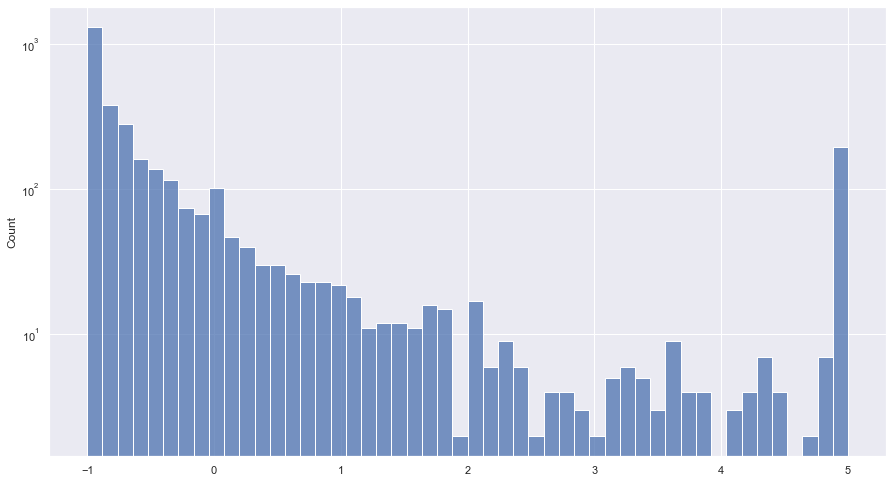

In [724]:


allcoins_df = lastrow_data.apply(lambda x: round(x,1) )
allcoins_df = lastrow_data.apply(lambda x: 5 if float(x) > 5 else x ) 
allcoins_df_numpy = allcoins_df.to_numpy()
# test.hist() #for each col
plt.yscale('log')

# plt.hist(test.flatten(), bins=20)


sns_all_coins_graph = sns.histplot(data=allcoins_df_numpy.flatten(),legend=False,bins=50)
# show_values_on_bars(sns_all_coins_graph)

## Separate by year of launch

In [631]:
# separate by year of launch

df_coins = pd.read_csv("/Users/adam/development/coingecko-analysis/data/processed_tables/coin_details.csv")
df_coins["first_date"] = df_coins["first_date"].apply(lambda x: x[:4] ) #strip it to months
df_coins["first_date"] = pd.to_datetime(df_coins["first_date"])
#drop all data before year 2018. It is old and not needed
df_coins = df_coins[df_coins["first_date"].dt.year >= 2018 ]

print(df_coins)


                   coin_id first_date
0                goldblock 2020-01-01
1                     arth 2021-01-01
2     interest-bearing-dpi 2021-01-01
3                dexa-coin 2019-01-01
4              californium 2018-01-01
...                    ...        ...
7264         coinfirm-amlt 2018-01-01
7265             nms-token 2019-01-01
7266                 april 2021-01-01
7267                   scc 2020-01-01
7268                 vixco 2021-01-01

[6776 rows x 2 columns]


In [888]:
#### Make a function to create histograms for coins based on year


def build_df_for_specficic_year(year_number):
    """utility function to build a df for a year"""
    year_df = df_change_since_day0  #this needs to be all entries
    
#     print(year_df)
    
    year_string = f"{year_number}-01-01"
    coins_year = df_coins[df_coins["first_date"]== year_string ]["coin_id"]
    list_coins_year = coins_year.tolist()
    
    display(f"{year_number} coins: {len(list_coins_year)}")

    year_df_content = year_df[year_df.columns.intersection(list_coins_year)] 
    
    return year_df_content

def create_df_by_year(year_number):
    
    year_df_content = build_df_for_specficic_year(year_number)

    year_df_content = year_df_content.to_numpy()
    # test.hist() #for each col
    plt.yscale('log')
    sns.histplot(data=year_df_content.flatten(),legend=False,bins=50)
    
# allcoins_df[list_2018]
# sns.histplot(data=test[[list_2018]].flatten(),legend=False,bins=50)

# print(list_2018)

def compare_profit_vs_loss(year_number):
    """Will display count of losses vs count of profits"""
    year_df = allcoins_df
    year_string = f"{year_number}-01-01"
    coins_year = df_coins[df_coins["first_date"]== year_string ]["coin_id"]
    list_coins_year = coins_year.tolist()
    year_df_content = year_df[year_df.columns.intersection(list_coins_year)] 
    
    #new code
    year_df_content = year_df_content.apply(lambda x: 1 if float(x) > 0 else -1 )
    
    #prep for histogram
    year_df_content = year_df_content.to_numpy()
    sns.histplot(data=year_df_content.flatten(),legend=False,bins=2)
    

def compare_profit_vs_loss_percentage(year_number):
    """Will display value as a colmulated percentage of losses vs culmulated percentage of profits"""
    year_df = allcoins_df
    year_string = f"{year_number}-01-01"
    coins_year = df_coins[df_coins["first_date"]== year_string ]["coin_id"]
    list_coins_year = coins_year.tolist()
    year_df_content = year_df[year_df.columns.intersection(list_coins_year)].reset_index() 
    
    #new code
    year_df_content_losses = year_df_content[year_df_content < 0]
    losses = year_df_content_losses.sum(axis=1).tolist()
    losses = round(losses[0],2)
    
    gains = year_df_content[year_df_content > 0].sum(axis=1).tolist()
    gains = round(gains[0],2)
    
    print(f"Losses: {losses}%")
    print(f"Profits: {gains}%")
    print(f"Position: {round(gains+losses,2)}% ")
    
#     year_df_content = year_df_content.apply(lambda x: 1 if float(x) > 0 else -1 )
    
    #prep for histogram
#     year_df_content = year_df_content.to_numpy()
#     sns.histplot(data=year_df_content.flatten(),legend=False,bins=2)

def percentile_report(year_number):#sum position should not be added for p analysis
    
    year_source_df = build_df_for_specficic_year(year_number)
    
    df_report_summary_since_dayX = pd.DataFrame()
#     df_report_summary_since_dayX["sum_position"] = df_change_since_day0.reset_index().sum(axis=1) #.apply(lambda x: round(x, 3))
    df_report_summary_since_dayX["p50"] = year_source_df.reset_index().quantile(q=0.5,axis=1) #.apply(lambda x: round(x, 3))
    df_report_summary_since_dayX["p80"] = year_source_df.reset_index().quantile(q=0.8,axis=1)
    df_report_summary_since_dayX["p99"] = year_source_df.reset_index().quantile(q=0.99,axis=1)
    df_report_summary_since_dayX["p20"] = year_source_df.reset_index().quantile(q=0.20,axis=1)
    df_report_summary_since_dayX["p01"] = year_source_df.reset_index().quantile(q=0.01,axis=1)
    
    display(df_report_summary_since_dayX)
#     df_report_summary_since_dayX_p = df_report_summary_since_dayX.drop(columns=["sum_position"])
#     plt.yscale('symlog')
    sns.set_context("talk")
    graph = sns.lineplot(data=df_report_summary_since_dayX)
    graph.set_yscale('symlog')
    
    sns.set(rc={'figure.figsize':(15,10)})
    
    ticks = [ -1, -0.5, 0,  0.3, 1, 3, 50, 100]
    labels = [f"{i*100}%" for i in ticks]
    graph.set(yticks = ticks, yticklabels = labels)
    
def top_and_bottom_performing(year_number,limit=10):#sum position should not be added for p analysis
    """displays the coins within this percentile"""
    year_df = allcoins_df  #get the last row 
    year_string = f"{year_number}-01-01"
    coins_year = df_coins[df_coins["first_date"]== year_string ]["coin_id"]
    list_coins_year = coins_year.tolist()
    year_df_content = year_df[year_df.columns.intersection(list_coins_year)].reset_index() 
    
    year_df_content_transpose = year_df_content.transpose()[1:]
    year_df_content_transpose = year_df_content_transpose.rename(columns={0:"percentage_gain"})
#     year_df_content_rank = pd.DataFrame()
    year_df_content_transpose['rank'] = year_df_content_transpose.percentage_gain.rank(pct = True)
    
#     display(year_df_content_rank)
    print("Top performing")
    display(year_df_content_transpose.sort_values(["rank"], ascending=False).head(limit)   )
    print("Bottom performing")
    display(year_df_content_transpose.sort_values(["rank"], ascending=True).head(limit)   )
    

Losses: -951.88%
Profits: 713.23%
Position: -238.65% 


'2018 coins: 1350'

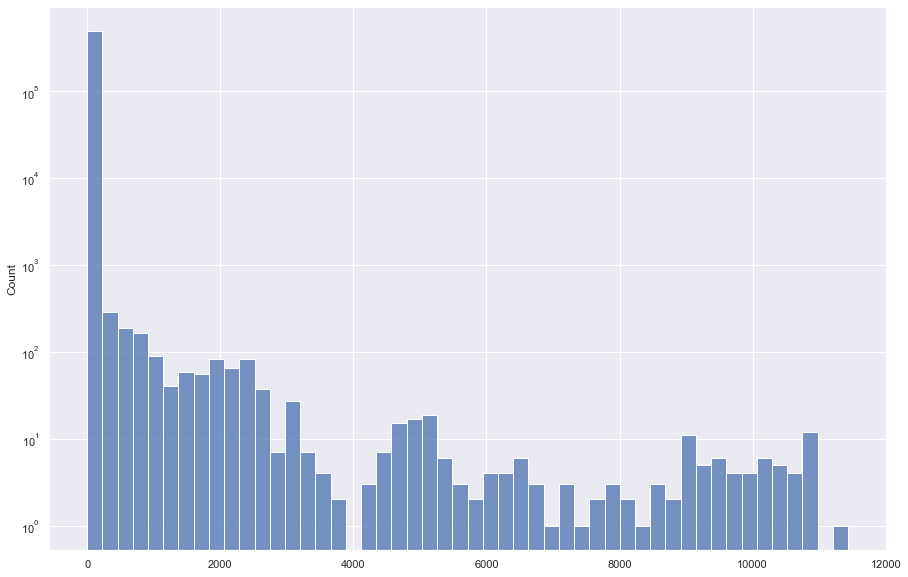

In [834]:
#2018
compare_profit_vs_loss_percentage(2018)
create_df_by_year(2018)


'2018 coins: 1350'

,p50,p80,p99,p20,p01
0,0.000,0.000,0.000,0.000,0.000
1,-0.013,0.095,1.486,-0.133,-0.657
2,-0.020,0.122,4.764,-0.187,-0.789
3,-0.039,0.146,5.665,-0.200,-0.727
4,-0.060,0.173,6.810,-0.260,-0.866
...,...,...,...,...,...
360,-0.879,-0.426,50.109,-0.973,-1.000
361,-0.882,-0.436,45.630,-0.974,-1.000
362,-0.878,-0.430,46.869,-0.974,-1.000
363,-0.877,-0.430,44.704,-0.973,-1.000


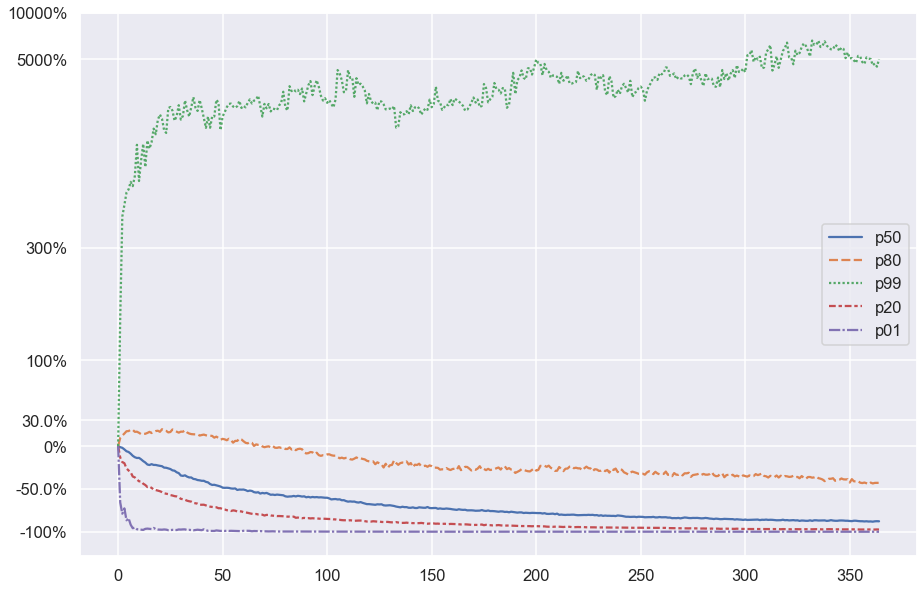

In [835]:
percentile_report(2018)

In [889]:
top_and_bottom_performing(2018)

Top performing


,percentage_gain,rank
thorecoin,5.000,0.985
signaturechain,5.000,0.985
tokenstars-team,5.000,0.985
tratok,5.000,0.985
gonetwork,5.000,0.985
get-token,5.000,0.985
powercoin,5.000,0.985
blue-whale,5.000,0.985
reecoin,5.000,0.985
bitball,5.000,0.985


Bottom performing


,percentage_gain,rank
eos-eth,-1.000,0.001
dowcoin,-1.000,0.001
decenturion,-1.000,0.002
escroco,-1.000,0.003
provoco,-1.000,0.004
forte-coin,-1.000,0.004
ctc,-1.000,0.005
treasure-financial-coin,-1.000,0.006
innovative-bioresearch,-1.000,0.007
filecash,-1.000,0.007


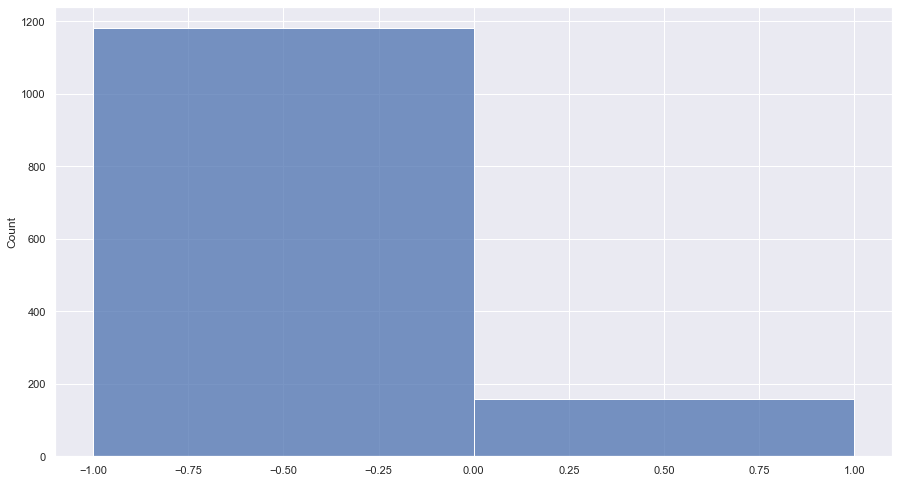

In [732]:
compare_profit_vs_loss(2018)

Losses: -676.18%
Profits: 887.18%
Position: 211.0% 


'2019 coins: 1243'

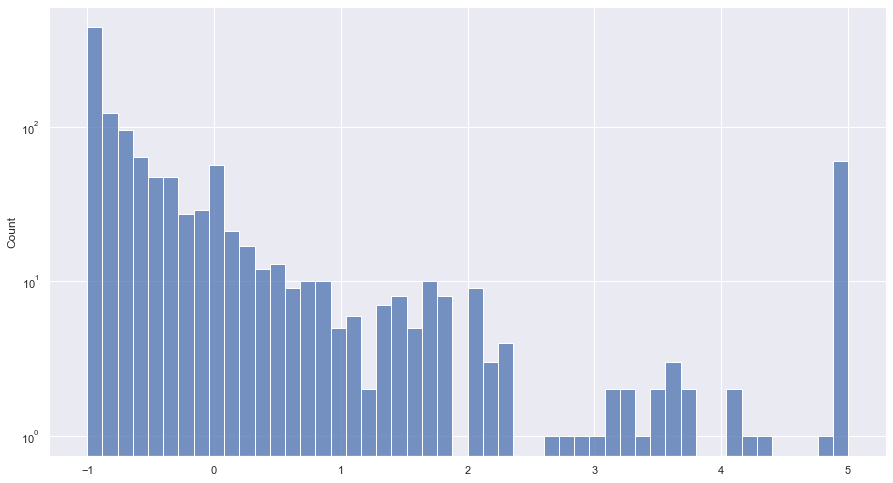

In [725]:
#2019
compare_profit_vs_loss_percentage(2019)
create_df_by_year(2019)

In [890]:
top_and_bottom_performing(2019)

Top performing


,percentage_gain,rank
tellor,5.000,0.975
phantom,5.000,0.975
hex,5.000,0.975
bitcoin-platinum,5.000,0.975
1million-token,5.000,0.975
newscrypto-coin,5.000,0.975
bkex-token,5.000,0.975
banana-token,5.000,0.975
q-dao-governance-token-v1-0,5.000,0.975
xio,5.000,0.975


Bottom performing


,percentage_gain,rank
nosturis,-1.000,0.001
3x-short-chainlink-token,-1.000,0.002
3x-short-tomochain-token,-1.000,0.003
ubricoin,-1.000,0.003
3x-short-bitmax-token-token,-1.000,0.004
3x-short-algorand-token,-1.000,0.005
up-token,-1.000,0.006
3x-short-dragon-index-token,-1.000,0.007
bitcratic,-1.000,0.008
sappchain,-1.000,0.009


'2019 coins: 1243'

,p50,p80,p99,p20,p01
0,0.000,0.000,0.000,0.000,0.000
1,0.000,0.094,3.001,-0.098,-0.859
2,-0.003,0.144,3.116,-0.163,-0.938
3,-0.012,0.151,6.396,-0.197,-0.924
4,-0.016,0.174,5.116,-0.222,-0.919
...,...,...,...,...,...
360,-0.739,0.087,39.883,-0.974,-1.000
361,-0.736,0.115,43.596,-0.974,-1.000
362,-0.746,0.124,41.794,-0.975,-1.000
363,-0.742,0.113,46.363,-0.975,-1.000


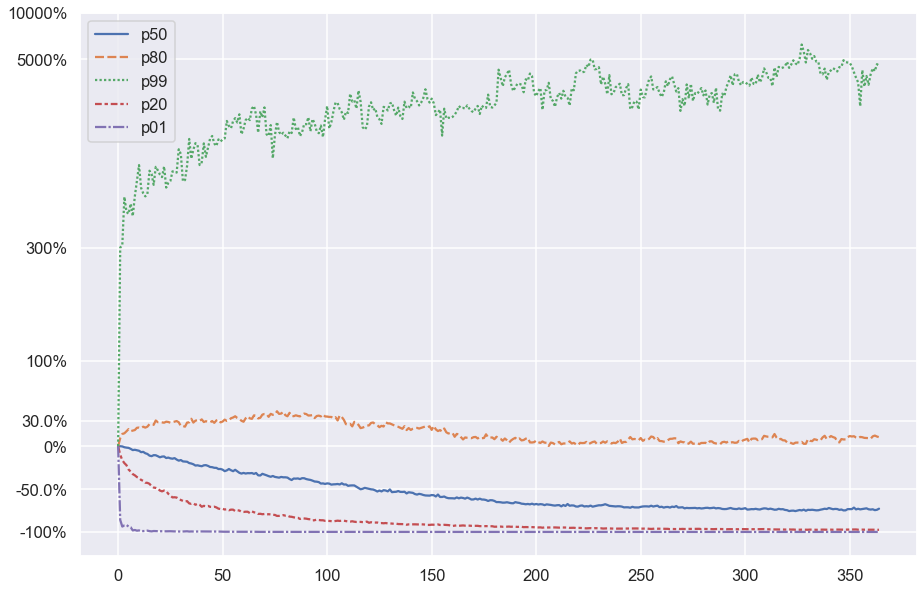

In [836]:
percentile_report(2019)

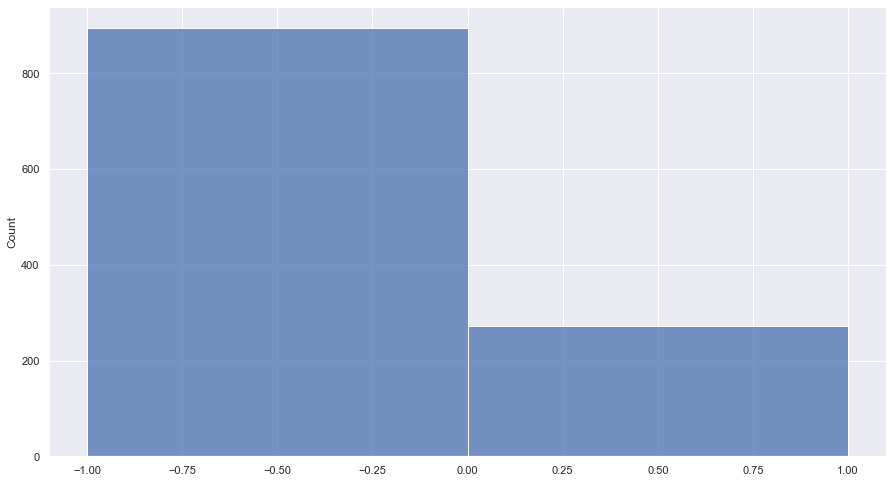

In [726]:
compare_profit_vs_loss(2019)

Losses: -112.9%
Profits: 801.4%
Position: 688.5% 


'2020 coins: 2136'

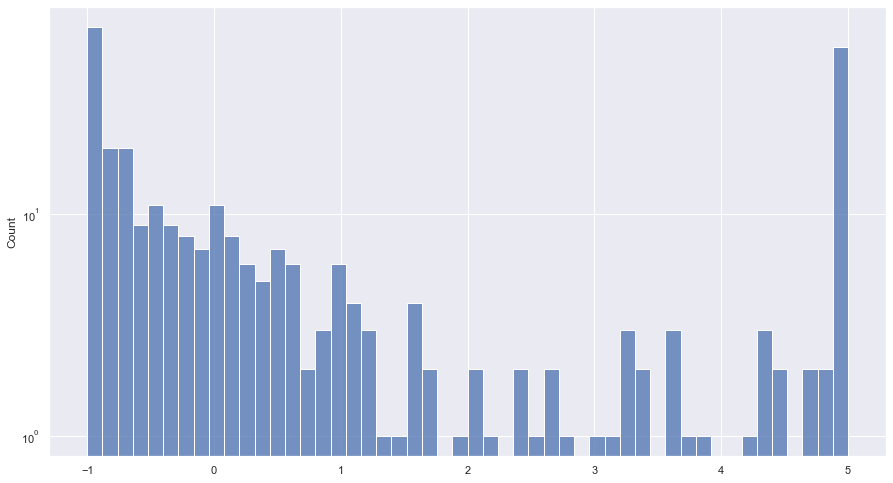

In [727]:
#2020
compare_profit_vs_loss_percentage(2020)
create_df_by_year(2020)

In [891]:
top_and_bottom_performing(2020)

Top performing


,percentage_gain,rank
gastoken,5.000,0.912
energy-web-token,5.000,0.912
dfohub,5.000,0.912
litecoin-bep2,5.000,0.912
kardiachain,5.000,0.912
eth-rsi-60-40-crossover-set,5.000,0.912
kiwi-token,5.000,0.912
xenios,5.000,0.912
tweebaa,5.000,0.912
data-trade-on-demand-platform,5.000,0.912


Bottom performing


,percentage_gain,rank
3x-short-dogecoin-token,-1.000,0.003
3x-short-exchange-token-index-token,-1.000,0.006
3x-short-midcap-index-token,-1.000,0.010
3x-short-huobi-token-token,-1.000,0.013
3x-short-bitcoin-sv-token,-1.000,0.016
dreamscoin,-1.000,0.019
3x-short-ethereum-classic-token,-1.000,0.022
sumcoin,-1.000,0.026
flit-token,-1.000,0.029
crybet,-1.000,0.032


'2020 coins: 2136'

,p50,p80,p99,p20,p01
0,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,1.128,0.000,-0.734
2,-0.014,0.106,3.529,-0.198,-0.908
3,-0.021,0.140,5.627,-0.295,-0.957
4,-0.033,0.163,5.584,-0.339,-0.981
...,...,...,...,...,...
360,0.041,4.556,446.611,-0.890,-1.000
361,0.017,4.792,448.669,-0.900,-1.000
362,0.014,4.683,433.481,-0.898,-1.000
363,-0.045,4.449,453.018,-0.901,-1.000


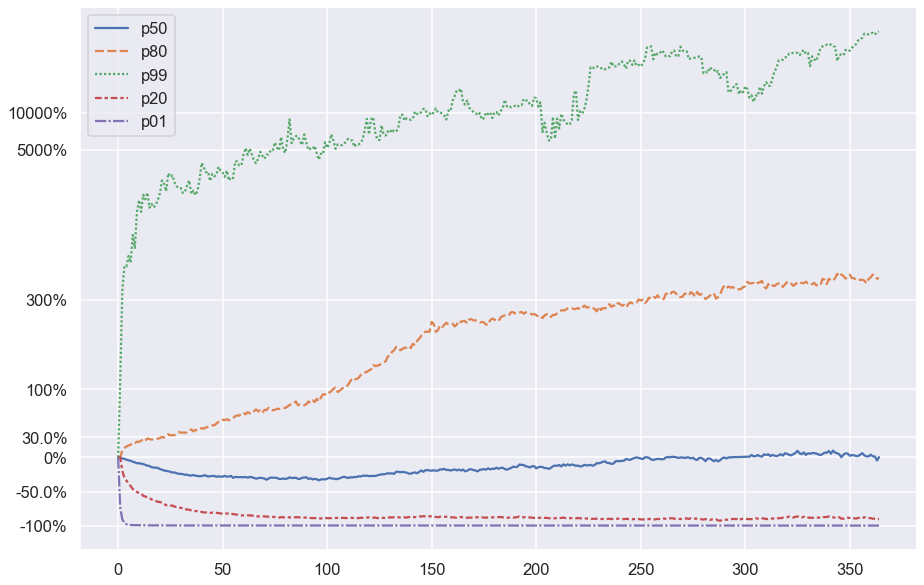

In [837]:
percentile_report(2020)

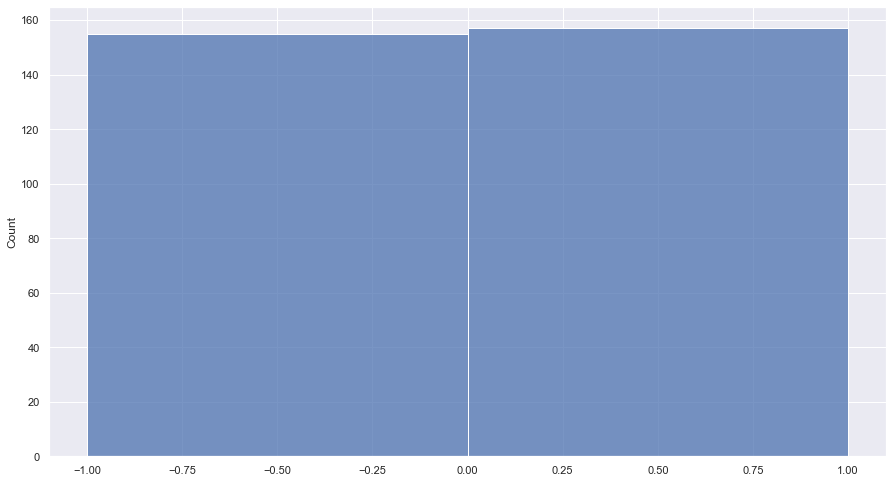

In [735]:
compare_profit_vs_loss(2020)

Losses: 0.0%
Profits: 364%
Position: 364.0% 


'2021 coins: 2047'

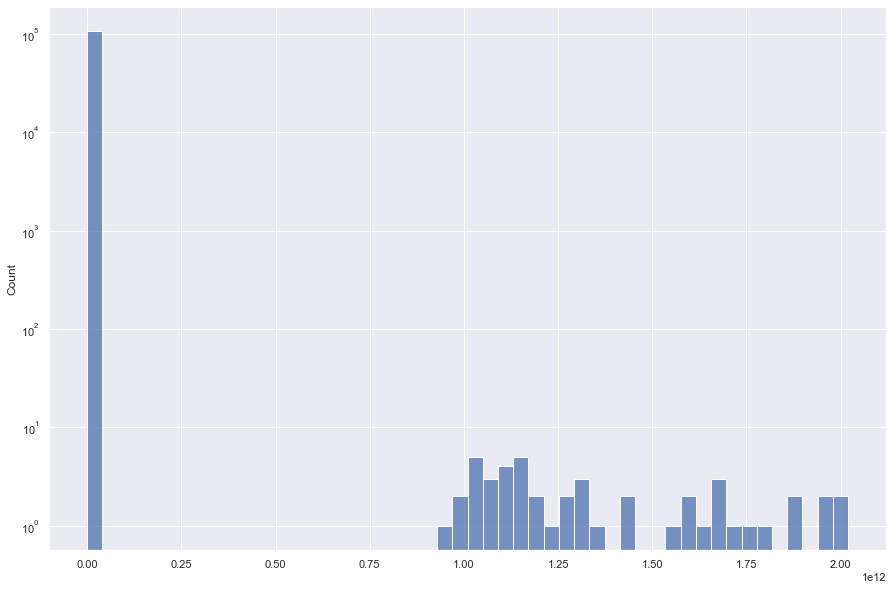

In [838]:
#2021
compare_profit_vs_loss_percentage(2021)
create_df_by_year(2021)

In [892]:
top_and_bottom_performing(2021)

Top performing


,percentage_gain,rank


Bottom performing


,percentage_gain,rank


'2021 coins: 2047'

,p50,p80,p99,p20,p01
0,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.006,0.000,-0.096
2,-0.028,0.135,2.163,-0.235,-0.822
3,-0.057,0.147,3.375,-0.327,-0.940
4,-0.067,0.167,4.312,-0.378,-0.946
...,...,...,...,...,...
360,360.000,360.000,360.000,360.000,360.000
361,361.000,361.000,361.000,361.000,361.000
362,362.000,362.000,362.000,362.000,362.000
363,363.000,363.000,363.000,363.000,363.000


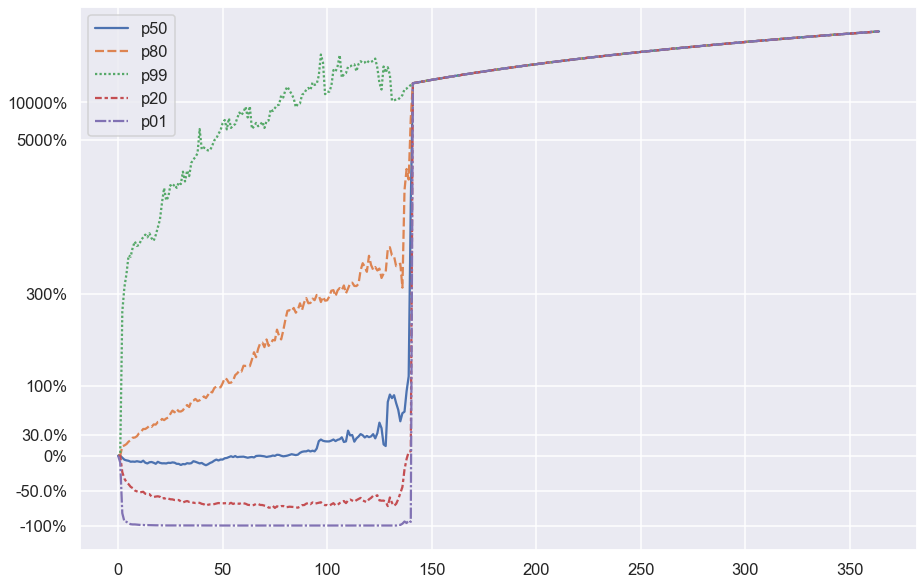

In [839]:
percentile_report(2021)

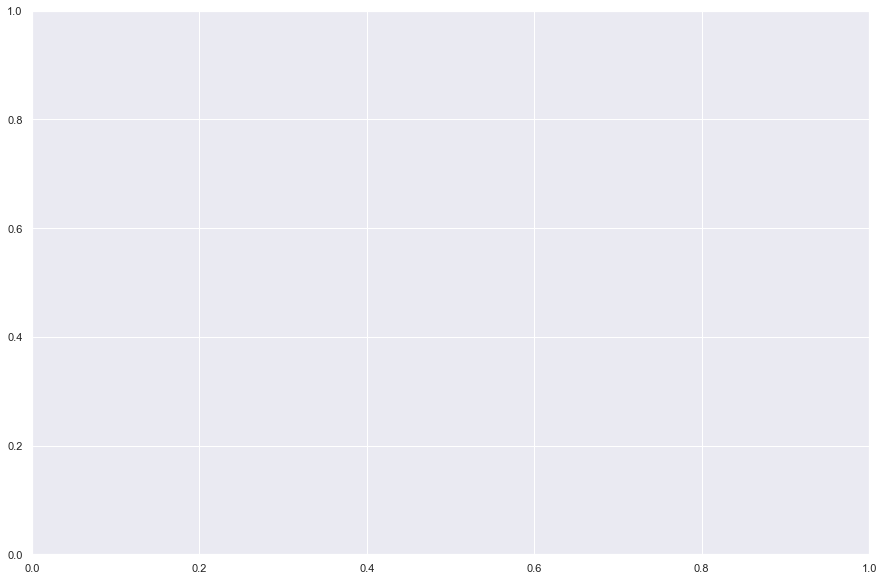

In [840]:
compare_profit_vs_loss(2021)

# Global percentile report

In [797]:
def percentile_report():#sum position should not be added for p analysis
    df_report_summary_since_dayX = pd.DataFrame()
#     df_report_summary_since_dayX["sum_position"] = df_change_since_day0.reset_index().sum(axis=1) #.apply(lambda x: round(x, 3))
    df_report_summary_since_dayX["p50"] = df_change_since_day0.reset_index().quantile(q=0.5,axis=1) #.apply(lambda x: round(x, 3))
    df_report_summary_since_dayX["p80"] = df_change_since_day0.reset_index().quantile(q=0.8,axis=1)
    df_report_summary_since_dayX["p99"] = df_change_since_day0.reset_index().quantile(q=0.99,axis=1)
    df_report_summary_since_dayX["p20"] = df_change_since_day0.reset_index().quantile(q=0.20,axis=1)
    df_report_summary_since_dayX["p01"] = df_change_since_day0.reset_index().quantile(q=0.01,axis=1)
    
#     df_report_summary_since_dayX_p = df_report_summary_since_dayX.drop(columns=["sum_position"])
#     plt.yscale('symlog')
    sns.set_context("talk")
    graph = sns.lineplot(data=df_report_summary_since_dayX)
    graph.set_yscale('symlog')
    
    sns.set(rc={'figure.figsize':(15,10)})
    
    ticks = [ -1, -0.5, 0,  0.3, 1, 3, 50, 100]
    labels = [f"{i*100}%" for i in ticks]
    graph.set(yticks = ticks, yticklabels = labels)
    

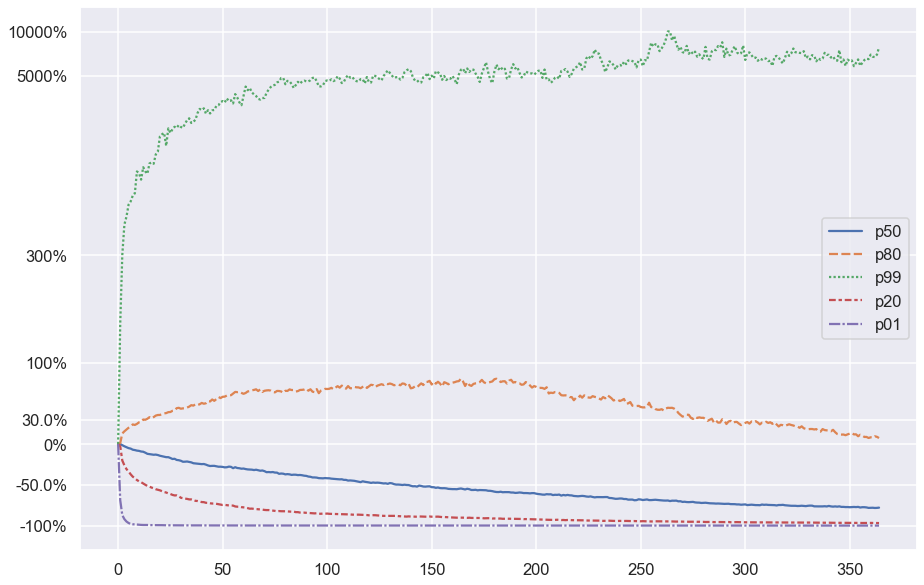

In [798]:
percentile_report()

In [419]:
# profits_ttl_data = df_change_since_day0[["sum_position","p01","p10","p50","p90","p99"]]


AttributeError: 'DataFrame' object has no attribute 'flatten'

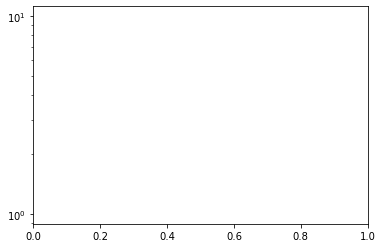

In [702]:
#profits_ttl_chart
# df_report_summary_since_dayX.head()

# report_p_graph = df_report_summary_since_dayX_p.plot()

sns.histplot(data=df_report_summary_since_dayX_p.flatten(),legend=False,bins=50)
# = sns.lineplot( data=profits_ttl_chart )
# profits_ttl_chart.set(xlabel='Date', ylabel='Profit')

In [ ]:
#scatter plot of final day



In [273]:
#test_01 = df_change_since_day0.dropna(axis=1)

# display(test_01.dropna( inplace=True, how='all'))
# display(test_01.isna() )
#test_01 = test_01[test_01>100].dropna(axis=1,how='all')
# test_01.drop(t_cols)

In [285]:
# display(test_01)

In [97]:
day0_price = 0.0029131619670739214
day1_price = 0.001904866214958147  
percent_change_num = (day1_price-day0_price) / day0_price
print(percent_change_num) # perc calc

#function
percent_change_fn(day1_price,day0_price)

-0.34611729917940015


-0.34611729917940015

In [286]:
# sns.lmplot(
#     data=data_4days,
#     x="day_number", y="profit_percent", hue="coin_id",
#     height=5
# )
            # data=data_4days, x="day_number", y="profit_percent" )